Inferencia Estadística

Alumnos: Cardozo Rodrigo, Larregle Matias, Levy Lara y Tarizzo Facundo

# **K-Means** - clustering

In [ ]:
# Importamos librerías
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Cargar base de datos a drive
from google.colab import drive
drive.mount('/content/drive')

url = "/content/drive/MyDrive/kmeans.csv"

df = pd.read_csv(url)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.columns

Index(['X', 'Y', 'Z'], dtype='object')

In [ ]:
df.isnull().sum()

,0
X,0
Y,0
Z,0


In [ ]:
X3 = df[['X' , 'Y' ,'Z']].iloc[: , :].values

scaler = StandardScaler()
X3 = scaler.fit_transform(X3)

inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001, random_state= 111, algorithm='elkan'))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

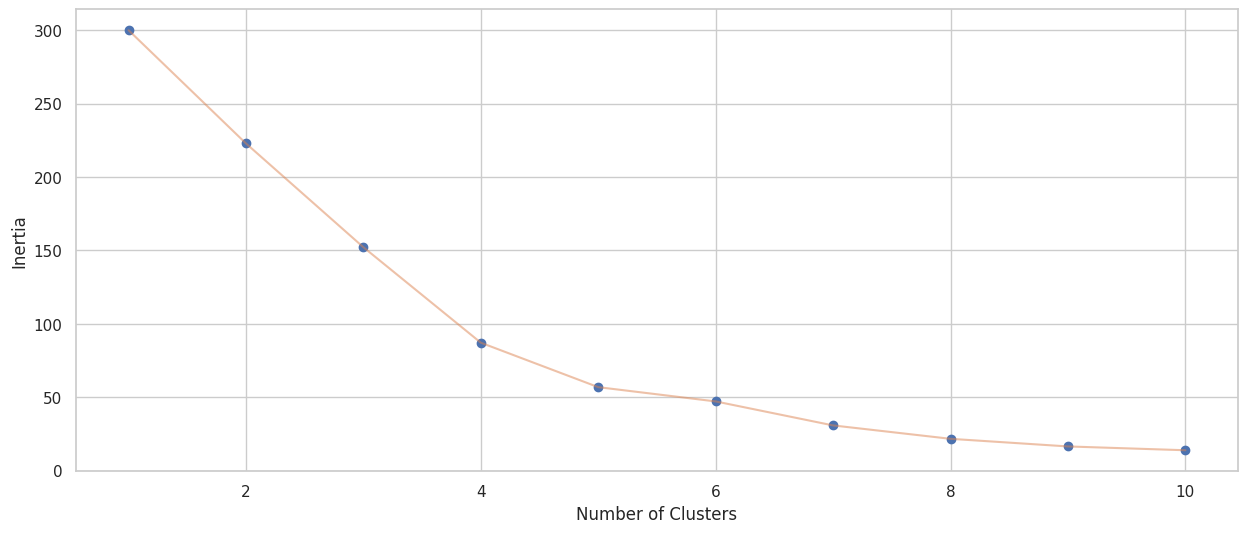

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X3)
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,X,Y,Z,cluster
0,0.014579,-0.014945,1.007415,3
1,0.014091,0.001891,1.008879,0
2,0.014823,0.000183,1.011807,0
3,0.014091,0.001159,1.011807,0
4,0.014579,-0.012749,1.001071,3


In [ ]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['X'],
    y= df['Y'],
    z= df['Z'],
    mode='markers',
     marker=dict(
        color = df['cluster'],
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'X'),
            yaxis = dict(title  = 'Y'),
            zaxis = dict(title  = 'Z')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

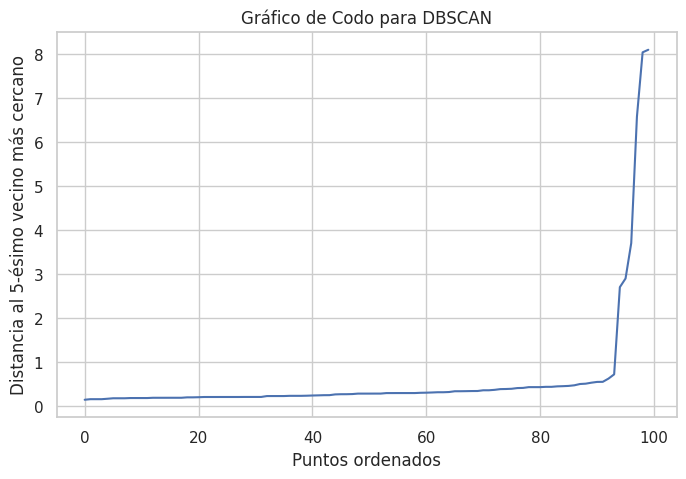

In [ ]:
# Calcular distancias a los 5 vecinos más cercanos
k = 5
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(X3)
distances, indices = nbrs.kneighbors(X3)

# Ordenar las distancias del k-ésimo vecino
sorted_distances = np.sort(distances[:, k-1])  # k-1 porque los índices comienzan en 0

# Crear el gráfico
plt.figure(figsize=(8, 5))
plt.plot(sorted_distances)
plt.xlabel('Puntos ordenados')
plt.ylabel(f'Distancia al {k}-ésimo vecino más cercano')
plt.title('Gráfico de Codo para DBSCAN')
plt.grid(True)
plt.show()

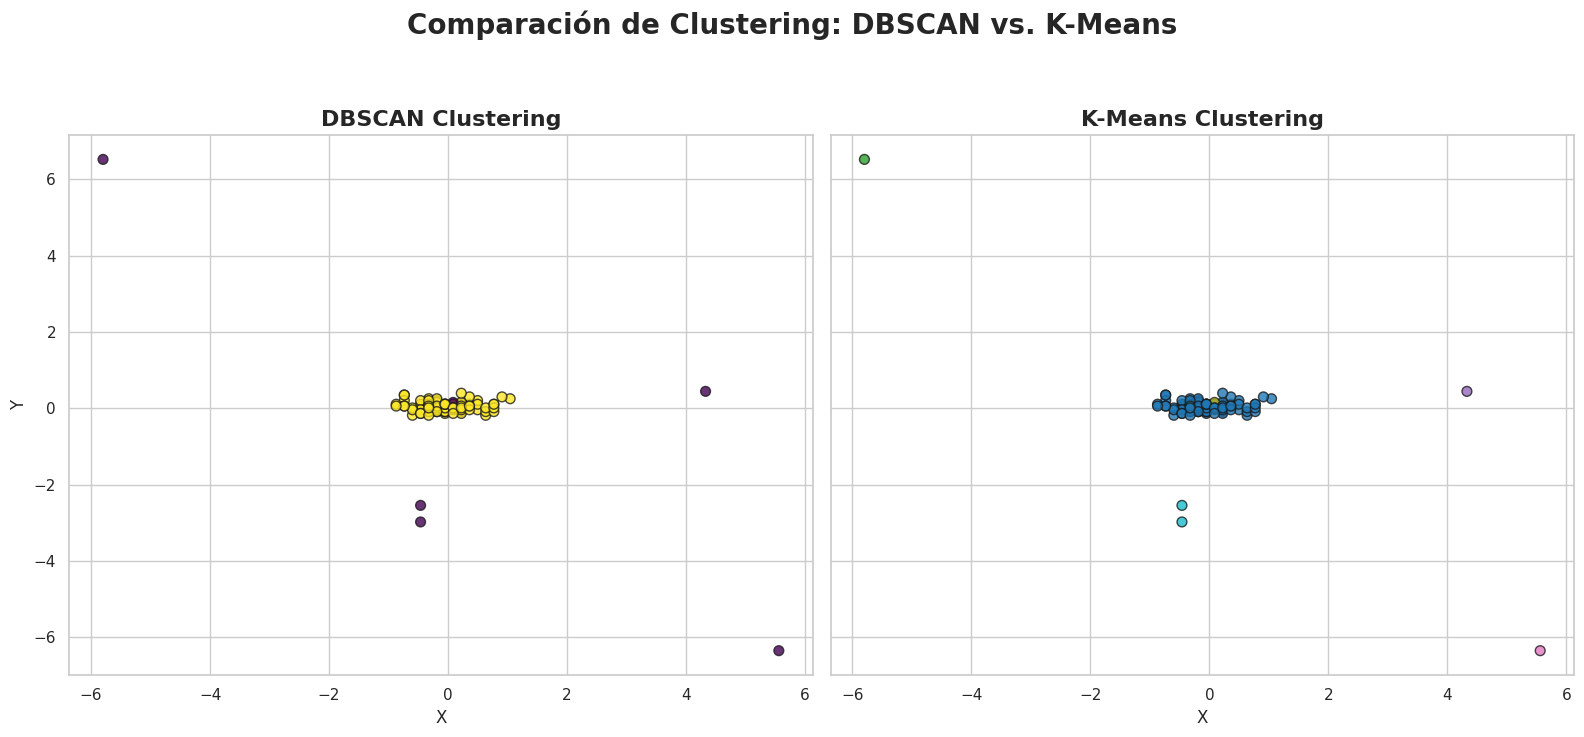

In [ ]:
# Crear los modelos de clustering
dbscan = DBSCAN(eps=0.8, min_samples=15)
dbscan_labels = dbscan.fit_predict(X3)

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(X3)

# Configuración de estilo
sns.set(style="whitegrid")

# Crear los gráficos mejorados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), sharex=True, sharey=True)

# Colores personalizados
dbscan_colors = sns.color_palette('viridis', np.unique(dbscan_labels).size)
kmeans_colors = sns.color_palette('tab10', 6)

# Gráfico DBSCAN
scatter1 = ax1.scatter(X3[:, 0], X3[:, 1], c=dbscan_labels, cmap='viridis', s=50, edgecolor='k', alpha=0.8)
ax1.set_title('DBSCAN Clustering', fontsize=16, fontweight='bold')
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('Y', fontsize=12)
ax1.grid(True)

# Gráfico K-Means
scatter2 = ax2.scatter(X3[:, 0], X3[:, 1], c=kmeans_labels, cmap='tab10', s=50, edgecolor='k', alpha=0.8)
ax2.set_title('K-Means Clustering', fontsize=16, fontweight='bold')
ax2.set_xlabel('X', fontsize=12)
ax2.grid(True)

# Ajustar diseño general
plt.suptitle('Comparación de Clustering: DBSCAN vs. K-Means', fontsize=20, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# **DBSCAN** - clustering

In [ ]:
# Importamos librerías
# ==============================================================================
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
import numpy as np
from sklearn.datasets import make_moons
from sklearn.neighbors import NearestNeighbors

In [ ]:
# Cargar base de datos a drive
from google.colab import drive
drive.mount('/content/drive')

url = "/content/drive/MyDrive/dbscan.xlsx"

df = pd.read_excel(url)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.columns

Index(['x', 'y'], dtype='object')

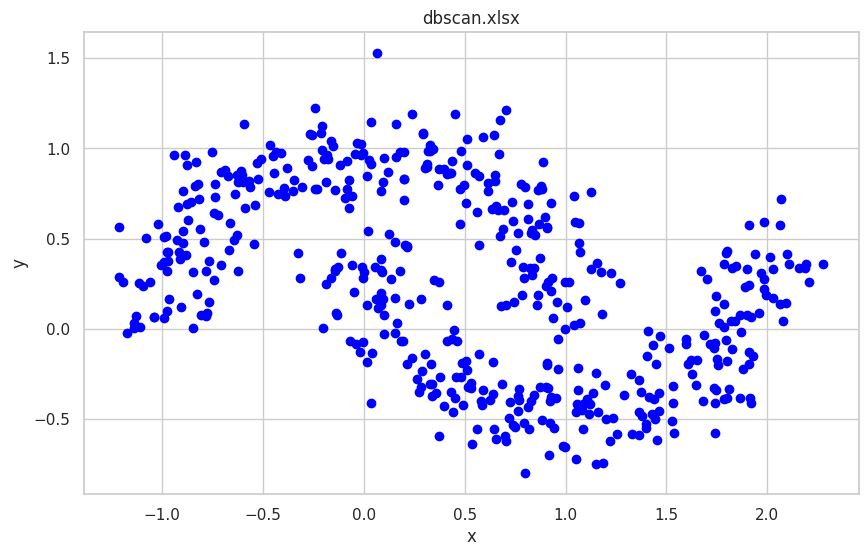

In [ ]:
# Visualizamos nuestro dataset

plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], c='blue', marker='o')
plt.title('dbscan.xlsx')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

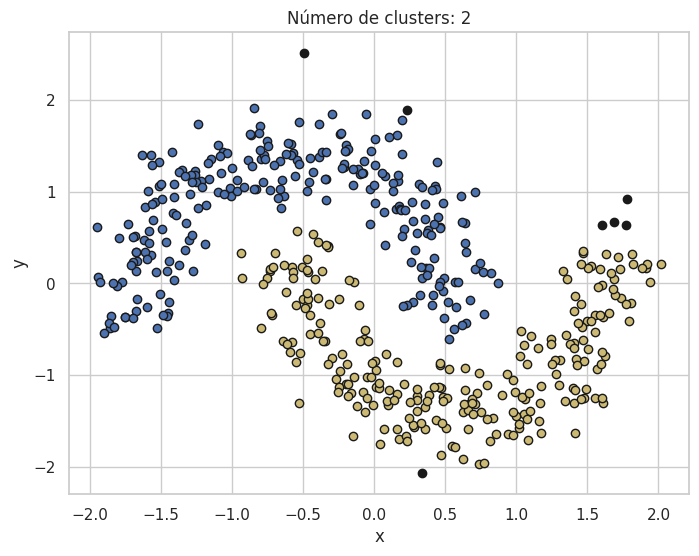

In [ ]:
# Normalizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['x', 'y']])

# Aplicamos elm modelo
db = DBSCAN(eps=0.3, min_samples=10).fit(X_scaled)
labels = db.labels_

# Paso 3: Identificar las muestras centrales
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Paso 4: Contar el número de clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Paso 5: Graficar los resultados
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']  # Puedes ajustar estos colores según el número de clusters

plt.figure(figsize=(8, 6))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'  # Usamos negro para el ruido

    # Mostrar los puntos pertenecientes al cluster y las muestras centrales
    class_member_mask = (labels == k)

    # Puntos centrales (core points)
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    # Puntos no centrales
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title(f'Número de clusters: {n_clusters_}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


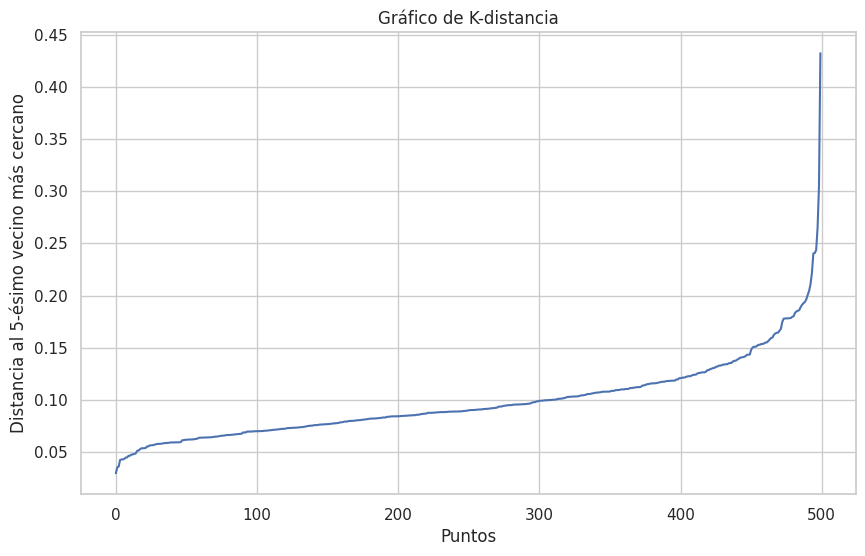

In [ ]:
X = df[['x', 'y']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Función para trazar el gráfico de k-distancia
def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])  # Ordenar las distancias del k-ésimo vecino
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Puntos')
    plt.ylabel(f'Distancia al {k}-ésimo vecino más cercano')
    plt.title('Gráfico de K-distancia')
    plt.show()

# Trazar el gráfico de k-distancia con k=5
plot_k_distance_graph(X, k=5)

In [ ]:
# Perform DBSCAN clustering
epsilon = 0.18  # Chosen based on k-distance graph
min_samples = 10  # 2 * num_features (2D data)
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(X)

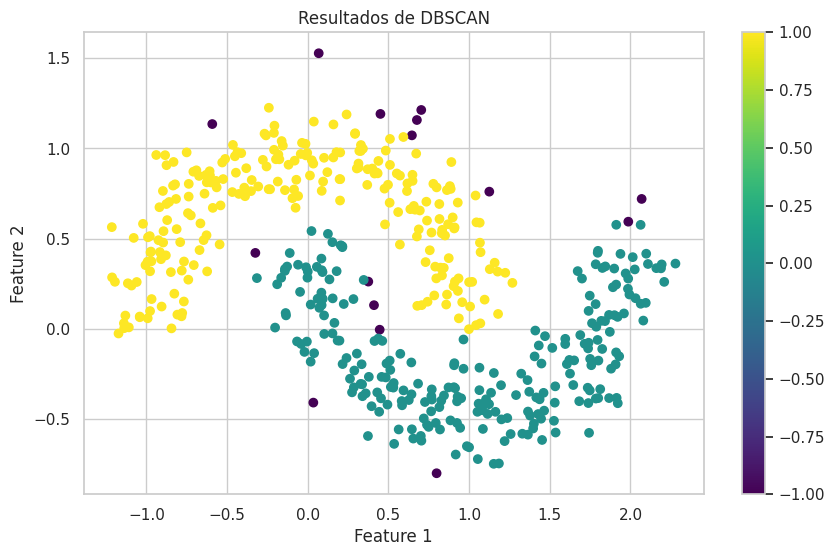

In [ ]:
# Visualizar los resultados
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)  # Añadir barra de colores para identificar los clusters
plt.title('Resultados de DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# Print number of clusters and noise points
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

Number of clusters: 2
Number of noise points: 15


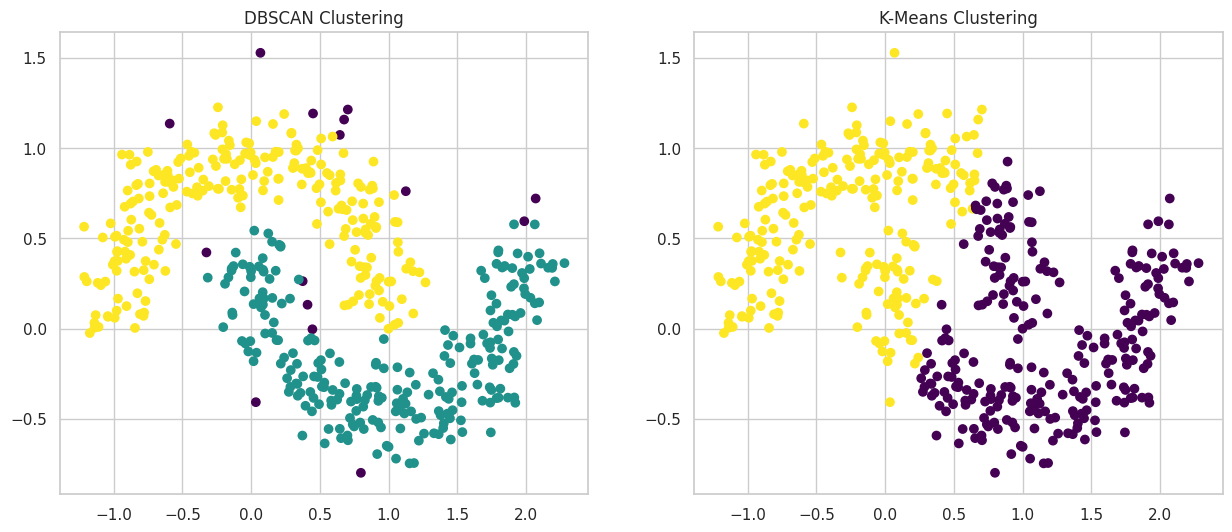

In [ ]:
from sklearn.cluster import KMeans

# DBSCAN clustering
dbscan = DBSCAN(eps=0.18, min_samples=10)
dbscan_labels = dbscan.fit_predict(X)

# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
ax1.set_title('DBSCAN Clustering')

ax2.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
ax2.set_title('K-Means Clustering')

plt.show()